<center> <b> <font size="+2"> SME0828 - Introdução à Ciência de Dados - Projeto 3 </font> </b> </center>

<center> <i> Danilo Augusto Ganancin Faria - Nº USP: 9609172 </i> </center>

<center> 13 de dezembro de 2020 </center>

Antes de iniciar a resolução dos exercícios é necessário limpar as variáveis e também carregar as bibliotecas que serão utilizadas.

In [1]:
# Limpando as variáveis
from IPython import get_ipython
get_ipython().magic('reset -sf') 

In [2]:
# Realizando importação das bibliotecas
import os
import random
import numpy as np
import pandas as pd 
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.pyplot import cm
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import multivariate_normal
from scipy.stats import iqr, poisson, pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn import datasets
import sklearn.datasets as skdata
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from IPython.display import Math, Latex
from IPython.core.display import Image
from scipy.spatial import distance
from sklearn.model_selection import train_test_split, KFold, cross_validate

In [3]:
# Configurando o alinhamento dos gráficos 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Exercício 1
Considere a base de dados sobre doenças cardíacas:
https://www.kaggle.com/ronitf/heart-disease-uci
Faça o pré-processamento dos dados e classifique os pacientes de acordo com a variável “target”. Considere os
classificadores: Bayesiano paramétrico, Bayesiano não-paramétrico e Naive Bayes.

In [4]:
# Leitura do arquivo do conjunto de dados 
heart = pd.read_csv('heart.csv', header = (0))
print('Este conjunto de dados possui {} linhas e {} colunas.'.format(heart.shape[0], heart.shape[1]))

Este conjunto de dados possui 303 linhas e 14 colunas.


In [5]:
# Identificando as colunas
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

A seguir é feito a descrição das varíaveis deste conjunto de dados para melhor compreendermos e interpretarmos os resultados.

 - **age:** idade do paciente (anos);
 - **sex:** sexo do paciente (1 = masculino, 0 = feminino);
 - **cp:** tipo de dor no peito (1 =  angina típica, 2 = angina atípica, 3 = dor não anginosa, 4 = assintomático);
 - **trestbps:** pressão arterial em repouso ($mm/Hg$);
 - **chol:** medição do colesterol ($mg/dl$);
 - **fbs:** quantidade de açúcar no sangue em jejum > 120 $mg/dl$ (1 = verdadeiro, 0 = falso);
 - **restecg:** resultados eletrocardiográficos em repouso (0 = normal, 1 = com anormalidade da onda ST-T, 2 = mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes); 
 - **thalach:** frequência cardíaca máxima alcançada;
 - **exang:** angina induzida por exercício (1 = sim, 0 = não);
 - **oldpeak:** Decaimento de ST induzida por exercício em relação ao repouso;
 - **slope:** inclinação de pico do exercício do segmento ST (1 = crescente, 2 = plana, 3 = decrescente); 
 - **ca:** número de vasos principais coloridos por fluoroscopia (0 - 3); 
 - **thal:** estado da talassemia (3 = normal, 6 = defeito corrigido, 7 = defeito reversível);
 - **target:** doença cardíaca (0 = não, 1 = sim).

In [6]:
# Mostra as primeiras dez linhas do conjunto de dados
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
# Identifica o tipo de dado em cada coluna
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
# Investigando possíveis linhas duplicadas
heart.duplicated().sum()

1

In [9]:
# Remove as linhas duplicadas
heart = heart.drop_duplicates()

In [10]:
# Investigando possíveis linhas duplicadas
heart.duplicated().sum()

0

In [11]:
# Verificando a existência de dados faltantes
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# Estatísticas descritivas das variáveis do conjunto de dados
heart.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


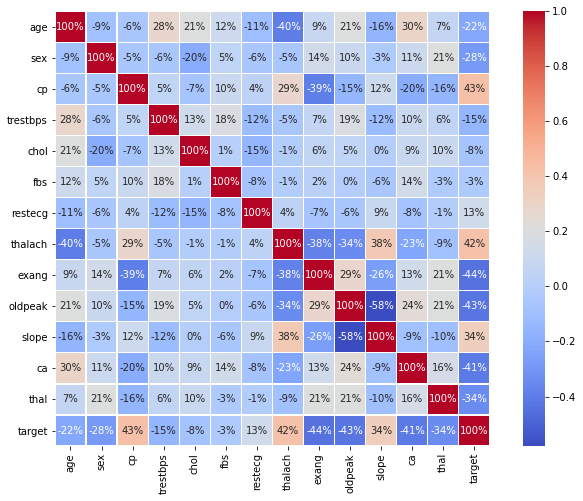

In [13]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(data=heart.corr().round(2), annot=True, fmt='.0%', cmap='coolwarm', linewidths=0.2, square=True)
plt.show(True)

In [14]:
# Quantidade de pacientes com ou sem doença cardíaca
heart.target.value_counts()

1    164
0    138
Name: target, dtype: int64

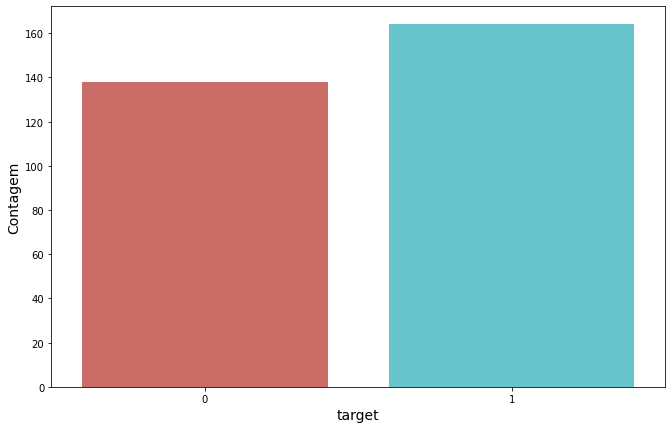

In [15]:
# Contagem de pacientes com ou sem doença cardíaca
plt.figure(figsize = (11, 7))
sns.countplot(x = "target", data = heart, palette = "hls")
plt.xlabel('target', fontsize = 14)
plt.ylabel('Contagem', fontsize = 14)
plt.show(True)

### Classificador Bayesiano paramétrico

In [16]:
data = heart.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

In [17]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [18]:
from sklearn.model_selection import train_test_split
p = 0.7 # fracao de elementos no conjunto de treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

In [19]:
 def classificador_bayesiano_parametrico(x_train, x_test, y_train, y_test):
  import pandas as pd 
  import numpy as np 
  from scipy.stats import multivariate_normal 
  from sklearn.metrics import accuracy_score

  classes = np.array(np.unique(y_train))  
  P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
  Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe

  ####  Realiza a classificacao ####
  # classicador bayesiano paramétrico
  for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elementos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = x_train[elements,:][0] # Elementos no conjunto de treinamento
    m = np.mean(Z, axis = 0) # Vetor media
    cv = np.cov(np.transpose(Z)) # Matriz de covariancia
    for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
      x = x_test[j,:]
      # calcula a probabilidade pertencer a cada classe
      pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
      P[classes[i]][j] = pj*Pc[i]
        
  y_pred = [] # Vetor com as classes preditas
  for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
  y_pred = np.array(y_pred)
  # calcula a acuracia
  score = accuracy_score(y_pred, y_test)
  return score

In [20]:
print("Acurácia:", classificador_bayesiano_parametrico(x_train, x_test, y_train, y_test))

Acurácia: 0.7802197802197802


### Classificador Bayesiano não-paramétrico

In [21]:
def classificador_bayesiano_nao_parametrico(x_train, x_test, y_train, y_test,h=2):
  import random
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  from sklearn.neighbors import KernelDensity
  from sklearn.metrics import accuracy_score

  classes = np.array(np.unique(y_train)) 
  P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
  Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
  for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = x_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel= 'gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
        x = x_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]
        
  y_pred = [] # Vetor com as classes preditas
  for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
  y_pred = np.array(y_pred)
  # calcula a acuracia
  score = accuracy_score(y_pred, y_test)
  return score

In [22]:
print("Acurácia:", classificador_bayesiano_nao_parametrico(x_train, x_test, y_train, y_test))

Acurácia: 0.8351648351648352


### Classificador Naive Bayes

In [23]:
def classificador_naive_bayes(x_train, x_test, y_train, y_test):
  from sklearn.naive_bayes import GaussianNB
  from sklearn import metrics

  model = GaussianNB()
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)
  score = accuracy_score(y_pred, y_test)
  return score, model, y_pred

In [24]:
print("Acurácia:",classificador_naive_bayes(x_train, x_test, y_train, y_test)[0])

Acurácia: 0.8461538461538461


Portanto, o classificador que apresentou melhor valor da acurácia foi o Naive Bayes, sendo ele o mais indicado para classificar os dados sobre doenças cardíacas.

## Exercício 2
No classificador Bayesiano não-paramétrico, verifique o efeito do hiperparâmetro *h* na classificação dos dados de
diabetes, encontrando seu melhor valor:
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [25]:
# Leitura do arquivo do conjunto de dados 
diabetes = pd.read_csv('diabetes.csv', header = (0))
print('Este conjunto de dados possui {} linhas e {} colunas.'.format(diabetes.shape[0], diabetes.shape[1]))

Este conjunto de dados possui 768 linhas e 9 colunas.


In [26]:
# Identificando as colunas
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

A seguir é feito a descrição das varíaveis deste conjunto de dados para melhor compreendermos e interpretarmos os resultados.

 - **Pregnancies:** número de vezes grávida;
 - **Glucose:** concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose;
 - **BloodPressure:** pressão arterial diastólica ($mm/Hg$);
 - **SkinThickness:** espessura da dobra da pele do tríceps ($mm$);
 - **Insulin:** insulina sérica de 2 horas ($\mu U/ml$);
 - **BMI:** índice de massa corporal (peso em kg / (altura em m) ^ 2);
 - **DiabetesPedigreeFunction:** função de pedigree de diabetes; 
 - **Age:** idade (anos);
 - **Outcome:** variável categórica (0 ou 1).

In [27]:
# Mostra as primeiras dez linhas do conjunto de dados
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [28]:
# Identifica o tipo de dado em cada coluna
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [29]:
# Investigando possíveis linhas duplicadas
diabetes.duplicated().sum()

0

In [30]:
# Verificando a existência de dados faltantes
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
# Estatísticas descritivas das variáveis do conjunto de dados
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


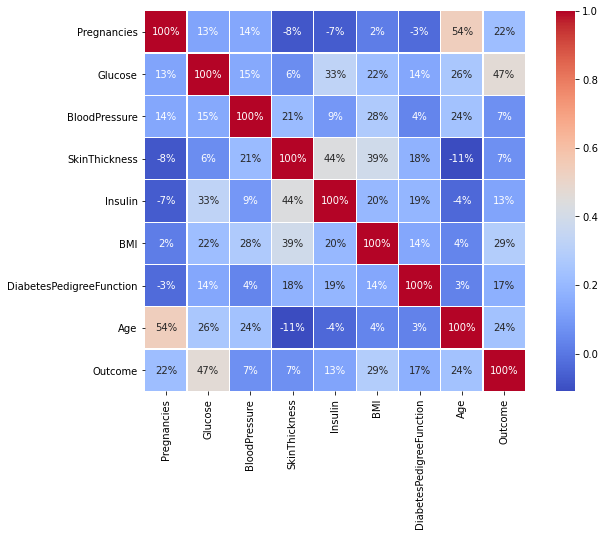

In [32]:
# Matriz de correlação  
plt.figure(figsize = (11, 7))
sns.heatmap(data = diabetes.corr().round(2), annot = True, fmt='.0%', cmap = 'coolwarm', linewidths = 0.2, square = True)
plt.show(True)

### Classificador Bayesiano não-paramétrico

In [33]:
vh = [0.1, 0.5, 1, 2, 5, 8, 10]
for i in vh:
  score_bayes_nao_parametrico = classificador_bayesiano_nao_parametrico(x_train, x_test, y_train, y_test,h = i)
  print("h =", i, "\n Acurácia Bayesiano não-paramétrico:", score_bayes_nao_parametrico)

h = 0.1 
 Acurácia Bayesiano não-paramétrico: 0.6483516483516484
h = 0.5 
 Acurácia Bayesiano não-paramétrico: 0.7802197802197802
h = 1 
 Acurácia Bayesiano não-paramétrico: 0.8021978021978022
h = 2 
 Acurácia Bayesiano não-paramétrico: 0.8351648351648352
h = 5 
 Acurácia Bayesiano não-paramétrico: 0.8351648351648352
h = 8 
 Acurácia Bayesiano não-paramétrico: 0.8351648351648352
h = 10 
 Acurácia Bayesiano não-paramétrico: 0.8461538461538461


De acordo com os resultados obtidos acima, observa-se que para $h = 10$ o valor da acurácia é de aproximadamente 0,85 que é o maior valor e, consequentemente o melhor ajuste.
Porém, vale ressaltar que quando o $h$ assume valores muito pequenos corre-se o risco de gerar sobreajuste (_overfitting_) pelo fato dos ruídos terem a mesma importância dos dados observados. Por outro lado, quando considera-se valores muito altos para $h$ há o risco de gerar subajuste (_underfitting_) pois perde-se informações pelo fato da suavização considerada ser muito grande.

## Exercício 3
Considere o código abaixo para gerar dados artificialmente.

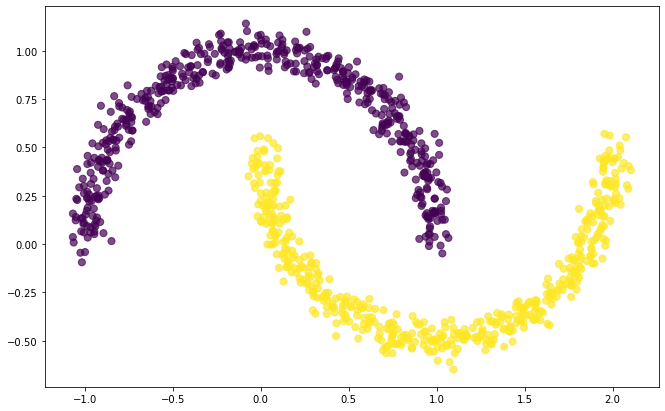

In [34]:
# Gerando os dados artificialmente 
plt.figure(figsize = (11, 7))
n_samples = 1000
data = datasets.make_moons(n_samples = n_samples, noise = .05)
X = data[0]
y = data[1]
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'viridis', s = 50, alpha = 0.7)
plt.show(True)

Compare os resultados para os métodos Naive Bayes, Classificador Bayesiano paramétrico e o classificador Bayesiano não-paramétrico, variando o ruído (noise). 

In [35]:
ruido = np.arange(0, 10, 0.4)
tabela_final ={"Bayesiano Paramétrico":[],
               "Bayesiano não-paramétrico":[],
               "Naive Bayes":[],
               "Ruído":[]}
for i in ruido:
 
   data = datasets.make_moons(n_samples = 100,
                             noise = i,
                             random_state = 42)
   
   x = data[0]
   y = data[1]
   scaler = StandardScaler().fit(x)
   X = scaler.transform(x)
   x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)
   acuracia_bayes_parametrico = classificador_bayesiano_parametrico(x_train, x_test, y_train, y_test)
   acuracia_bayes_nao_parametrico = classificador_bayesiano_nao_parametrico(x_train, x_test, y_train, y_test)
   acuracia_naive_bayes = classificador_naive_bayes(x_train, x_test, y_train, y_test)
   tabela_final["Bayesiano Paramétrico"].append(acuracia_bayes_parametrico)
   tabela_final["Bayesiano não-paramétrico"].append(acuracia_bayes_nao_parametrico)
   tabela_final["Naive Bayes"].append(acuracia_naive_bayes[0])
   tabela_final["Ruído"].append(i) 

In [36]:
df = pd.DataFrame(tabela_final)
df

,Bayesiano Paramétrico,Bayesiano não-paramétrico,Naive Bayes,Ruído
0,0.900000,0.933333,0.900000,0.0
1,0.833333,0.900000,0.833333,0.4
2,0.700000,0.766667,0.633333,0.8
3,0.666667,0.766667,0.566667,1.2
4,0.633333,0.666667,0.566667,1.6
5,0.566667,0.666667,0.533333,2.0
6,0.500000,0.633333,0.500000,2.4
7,0.533333,0.633333,0.500000,2.8
8,0.500000,0.633333,0.466667,3.2
9,0.500000,0.633333,0.466667,3.6


De acordo com que o ruído aumenta a acurácia dos modelos diminui, isto deve-se ao fato de que quanto maior o ruído mais difícil é a classificação. Dos modelos acima, o modelo menos suscetível ao ruído é o classificador Bayesiano não-paramétrico por apresentar melhores valores de acurácia. 

## Exercício 4
Considerando os dados artificiais do exercício anterior, mostre as regiões de separação para os métodos
Naive Bayes, k-vizinhos e regressão logística.

### K-vizinhos

In [37]:
   data = datasets.make_moons(n_samples = 1000, noise = 0.1,random_state = 42)
   x = data[0]
   y = data[1]
   scaler = StandardScaler().fit(x)
   X = scaler.transform(x)
   x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [38]:
def classificador_k_vizinhos(x_train, x_test, y_train, y_test):
 from sklearn.neighbors import KNeighborsClassifier
 k = 5 # numero de vizinhos
 # ajusta o modelo k-vizinhos
 model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
 model.fit(x_train,y_train)
 # faz a predição no conjunto de teste
 y_pred = model.predict(x_test) 
 score = accuracy_score(y_pred, y_test)
 return score, model, y_pred

In [39]:
print("Acurácia",classificador_k_vizinhos(x_train, x_test, y_train, y_test)[0])

Acurácia 1.0


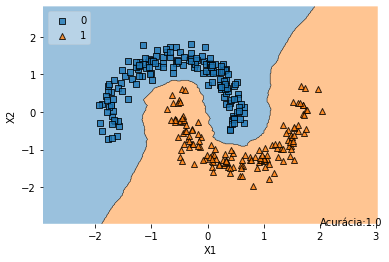

In [40]:
  from mlxtend.plotting import plot_decision_regions
  plot_decision_regions(x_test, y_test, clf=classificador_k_vizinhos(x_train, x_test, y_train, y_test)[1], legend=2)
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.text(x = 2,y = -3,s = "Acurácia:" + str(classificador_k_vizinhos(x_train, x_test, y_train, y_test)[0]))
  plt.show()

### Naive Bayes

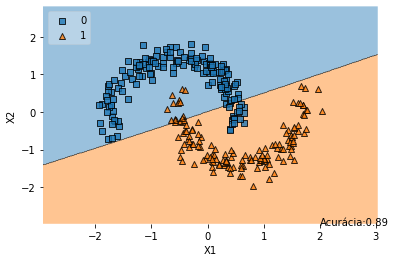

In [41]:
  from mlxtend.plotting import plot_decision_regions
  plot_decision_regions(x_test, y_test, clf=classificador_naive_bayes(x_train, x_test, y_train, y_test)[1], legend=2)
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.text(x = 2,y = -3,s = "Acurácia:" + str(classificador_naive_bayes(x_train, x_test, y_train, y_test)[0]))
  plt.show()

### Regressão logística

In [42]:
def classificador_regressao_logistica(x_train, x_test, y_train, y_test):
 from sklearn.linear_model import LogisticRegression
 model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
 model.fit(x_train, y_train)
 y_pred = model.predict(x_test) 
 score = accuracy_score(y_pred, y_test)
 return score, model

In [43]:
print("Acurácia",classificador_regressao_logistica(x_train, x_test, y_train, y_test)[0])

Acurácia 0.8866666666666667


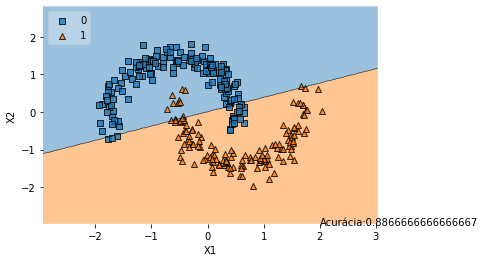

In [44]:
  from mlxtend.plotting import plot_decision_regions
  plot_decision_regions(x_test, y_test, clf=classificador_regressao_logistica(x_train, x_test, y_train, y_test)[1], legend=2)
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.text(x = 2,y = -3,s = "Acurácia:" + str(classificador_regressao_logistica(x_train, x_test, y_train, y_test)[0]))
  plt.show()

Portanto, o modelo que apresentou melhor classificação das regiões de separação foi o K-vizinhos.

## Exercício 5
Gere dois conjuntos de pontos em duas dimensões usando o código a seguir:

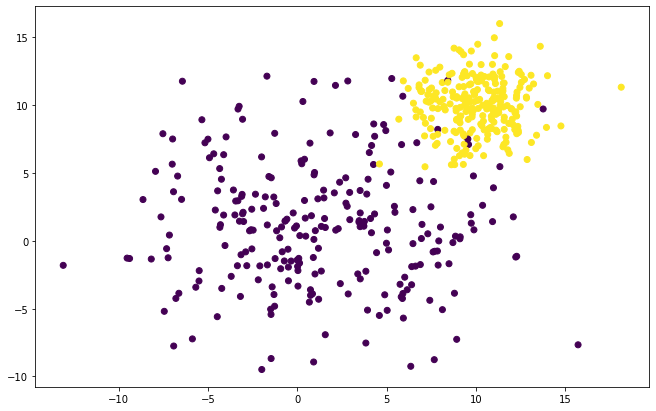

In [45]:
# Gerando os dados artificialmente
plt.figure(figsize = (11, 7))
n = 500
c = [(1, 1), (10, 10)] # center of the points
std = [5.0, 2] # standard deviation
nc = [400, 50] # number of points in each class
X, y = make_blobs(n_samples = n, n_features = 2, cluster_std = std,centers = c)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show(True)

Compare os classificadores Naive Bayes e Bayesiano Paramétrico variando a separação entre as nuvens de pontos
– mantenha a posição de uma classe fixa e mude a posição do centro da outra classe, calculando a distância entre
os centros.

In [46]:
from scipy.stats import multivariate_normal
from sklearn.base import BaseEstimator

class BayesParametric(BaseEstimator):
    
    def __init__(self):
        pass
    
##########################################################################################################################   
    def fit(self,x_train, y_train): 
        self.x_train = np.asarray(x_train)
        self.y_train = y_train
        x_train = np.asarray(x_train)
        y_train = np.asarray(y_train)
        
        global classes
        global m
        global cv
        global Pc
        global y_pred
        m = []
        classes = np.array(pd.unique(y_train))
        Pc = np.zeros(len(classes))        # fraction of elements in each class
        m = []
        cv = []
        for i in np.arange(0, len(classes)):                    # passa por cada classe
            elements = list(np.where(y_train == classes[i])[0]) # dá o indice de elementos que correspondem à classe i
            Pc[i] = len(elements)/len(y_train)                  # proporção de elementos que são da classe i
            Z = x_train[elements,:]                        # usando o indice seleciona elementos da classe i
            m.append(np.mean(Z, axis = 0))                            # pega as médias das colunas dos elementos da classe i
            cv.append(np.cov(np.transpose(Z)))                        # pega matriz cov dos elementos da classe i

############################################################################################################################   

    def predict(self,x_test): 
        self.x_test = x_test
        x_test = np.asarray(x_test)
        
        P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) #indica a probabilidade de ser de cada classe dado x

        for i in np.arange(0, len(classes)):   
            for j in np.arange(0,x_test.shape[0]):              # passa por cada linha dos elementos de teste     
                x = x_test[j,:]                            # pega a observação j do conjunto de teste
                pj = multivariate_normal.pdf(x, mean=m[i], cov=cv[i], allow_singular=True) #verossimilhança (prob de ser exatamente x com esse mu e esse cov)
                # pj é a probabilidade de gerar os dados dado à classe (considera mu e cov da classe)
                # Pc[i] é a probabilidade de qualquer obs pertencer à classe
                P[classes[i]][j] = pj*Pc[i]     # usa teorema de bayes pra ver a probabilida de pertencer à classe dado x

                #classificar de acordo com a classe que tem maior probab dado x
        
            y_pred = []
            #np.array(test_x.shape[0], dtype=str)
            for i in np.arange(0, x_test.shape[0]):
                c = np.argmax(np.array(P.iloc[[i]]))
                y_pred.append(classes[c])
            y_pred = np.array(y_pred)
            
        return y_pred
    
##################################################################################################################################
    def score(self, x_test, y_test):
        self.x_test = x_test
        self.y_test = y_test
        x_test = np.asarray(x_test)
        y_test = np.asarray(y_test)
        
        y_pred = BayesParametric().predict(x_test)
        from sklearn.metrics import accuracy_score
        score = accuracy_score(y_pred, y_test) 
        return score

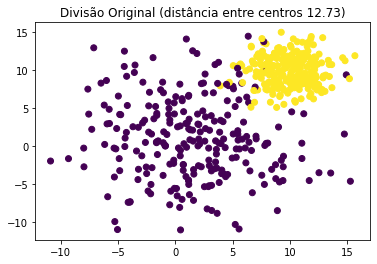

Score médio usando naive bayes:  0.97
Score médio usando classificador bayesiano paramétrico:  0.97



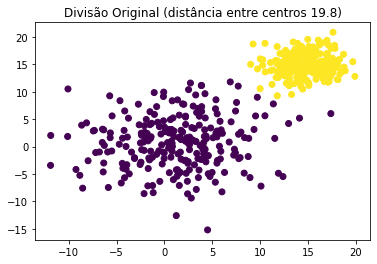

Score médio usando naive bayes:  1.0
Score médio usando classificador bayesiano paramétrico:  1.0



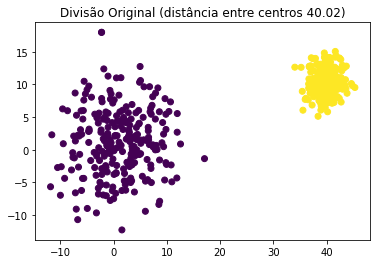

Score médio usando naive bayes:  1.0
Score médio usando classificador bayesiano paramétrico:  1.0



In [47]:
from scipy.spatial import distance
from sklearn.model_selection import cross_validate

np.set_printoptions(precision=2)
centers = [(10,10),(15,15),(40,10)]   #diferentes centros para a classe 1
nkf = 5

for i in range(0,len(centers)): 
    n = 500
    c = [(1,1), centers[i]] 
    std = [5.0, 2]       # standard deviation
    dataX, dataY = datasets.make_blobs(n_samples = n, n_features = 2, cluster_std = std,centers = c)
    dist = distance.euclidean(c[0], c[1])
    plt.scatter(dataX[:,0],dataX[:,1], c = dataY)
    plt.title(f"Divisão Original (distância entre centros {round(dist,2)})")
    plt.show(True) 
    
    dataX = StandardScaler().fit_transform(dataX) 
    ############### naive bayes
    cv1 = cross_validate(GaussianNB(), dataX, dataY, cv=nkf)
    print(f"Score médio usando naive bayes:  {round(cv1['test_score'].mean(),2)}")
    
    ############### bayesiano parametrico
    cv2 = cross_validate(BayesParametric(), dataX, dataY, cv=nkf)
    print(f"Score médio usando classificador bayesiano paramétrico:  {round(cv2['test_score'].mean(),2)}")  
    print()

In [48]:
# Criando coordenadas dos centros
coord_x, coord_y = np.arange(0,30), 5

tX, tY = np.meshgrid(coord_x, coord_y)
coords = np.dstack((tX, tY))[0]    # Possiveis coordenadas para o novo centro

In [49]:
# Gráfico da distância vs. score médio pra cada método
dist_list = []
cv_naive = []
cv_param = []
n = 500
nkf = 5

for coord in coords:
    c = [(1,1), coord] 
    std = [5.0, 2]       # Desvio padrão
    dataX, dataY = datasets.make_blobs(n_samples = n, n_features = 2, cluster_std = std,centers = c)
    dataX = StandardScaler().fit_transform(dataX) 
    dist = distance.euclidean(c[0], c[1])
    dist_list.append(dist)

    ############### Naive bayes
    cv1 = cross_validate(GaussianNB(), dataX, dataY, cv=nkf)
    cv_naive.append(cv1['test_score'].mean()) 

    ############### Bayesiano parametrico
    cv2 = cross_validate(BayesParametric(), dataX, dataY, cv=nkf)
    cv_param.append(cv2['test_score'].mean()) 

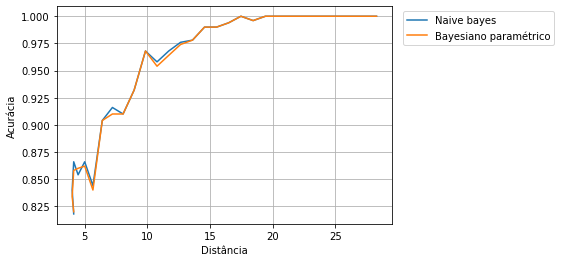

In [50]:
plt.plot(dist_list, cv_naive, label = "Naive bayes")
plt.plot(dist_list, cv_param, label = "Bayesiano paramétrico")
plt.legend(bbox_to_anchor = (1.5,1))
plt.xlabel("Distância")
plt.ylabel("Acurácia")
plt.title("")
plt.grid();

Portanto, quando é variada a distância entre os grupos, é possível observar que os classificadores Naive Bayes e Bayesiano paramétrico possuem desempenhos semelhantes.

## Exercício 6
Gere dois conjuntos de pontos em duas dimensões usando o código a seguir:

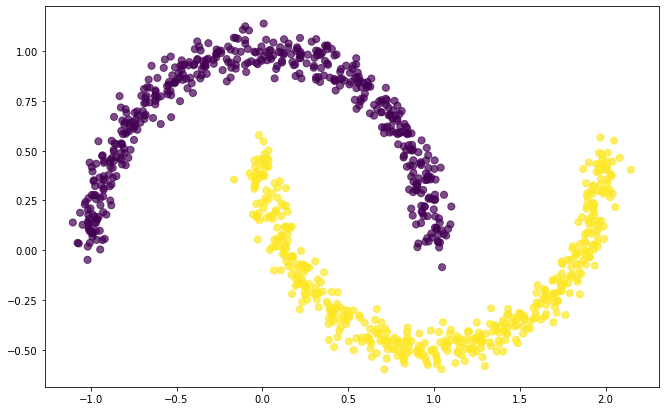

In [51]:
# Gerando os conjuntos de dados
plt.figure(figsize = (11, 7))
n_samples = 1000
data = datasets.make_moons(n_samples = n_samples, noise = .05)
X = data[0]
y = data[1]
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'viridis', s = 50, alpha = 0.7)
plt.show(True)

Compare os classificadores Naive Bayes, k-vizinhos mais próximos e regressão logística variando o nível de ruído (noise) no intervalo [0, 1]. No caso do algoritmo k-vizinhos, use o método _selection.GridSearchCV_ da biblioteca _sciki-learn_ para determinar a melhor medida de distância e o valor de $k$.

In [52]:
ruido = np.arange(0, 10, 0.4)
tabela_final ={"K-vizinhos":[],
               "Regressão logística":[],
               "Naive Bayes":[],
               "Ruído":[]}
for i in ruido:
 
   data = datasets.make_moons(n_samples = 1000,
                             noise = i,
                             random_state = 42)
   
   x = data[0]
   y = data[1]
   scaler = StandardScaler().fit(x)
   X = scaler.transform(x)
   x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)
   acuracia_k_vizinhos = classificador_k_vizinhos(x_train, x_test, y_train, y_test)
   acuracia_regressao_logistica = classificador_regressao_logistica(x_train, x_test, y_train, y_test)
   acuracia_naive_bayes = classificador_naive_bayes(x_train, x_test, y_train, y_test)
   tabela_final["K-vizinhos"].append(acuracia_k_vizinhos)
   tabela_final["Regressão logística"].append(acuracia_regressao_logistica)
   tabela_final["Naive Bayes"].append(acuracia_naive_bayes[0])
   tabela_final["Ruído"].append(i)

In [53]:
df6 = pd.DataFrame(tabela_final)
df6

,K-vizinhos,Regressão logística,Naive Bayes,Ruído
0,"(1.0, KNeighborsClassifier(metric='euclidean')...","(0.9133333333333333, LogisticRegression(max_it...",0.900000,0.0
1,"(0.8466666666666667, KNeighborsClassifier(metr...","(0.8333333333333334, LogisticRegression(max_it...",0.836667,0.4
2,"(0.6866666666666666, KNeighborsClassifier(metr...","(0.7266666666666667, LogisticRegression(max_it...",0.720000,0.8
3,"(0.6066666666666667, KNeighborsClassifier(metr...","(0.6666666666666666, LogisticRegression(max_it...",0.656667,1.2
4,"(0.5833333333333334, KNeighborsClassifier(metr...","(0.6233333333333333, LogisticRegression(max_it...",0.616667,1.6
5,"(0.58, KNeighborsClassifier(metric='euclidean'...","(0.6033333333333334, LogisticRegression(max_it...",0.600000,2.0
6,"(0.53, KNeighborsClassifier(metric='euclidean'...","(0.59, LogisticRegression(max_iter=1000))",0.583333,2.4
7,"(0.5333333333333333, KNeighborsClassifier(metr...","(0.5766666666666667, LogisticRegression(max_it...",0.576667,2.8
8,"(0.54, KNeighborsClassifier(metric='euclidean'...","(0.5633333333333334, LogisticRegression(max_it...",0.556667,3.2
9,"(0.53, KNeighborsClassifier(metric='euclidean'...","(0.5633333333333334, LogisticRegression(max_it...",0.550000,3.6


De acordo com que o ruído aumenta a acurácia diminui, o que já era esperado. Neste caso, o melhor classificador é a regressão logística.

## Exercício 7
Considerando os dados do código anterior, compare os algoritmos: árvores de decisão, florestas aleatórias e _bagging_. Use o método _selection.GridSearchCV_ da biblioteca _sciki-learn_ para determinar os melhores parâmetros dos modelos.

In [54]:
def classificador_floresta_aleatoria(x_train, x_test, y_train, y_test):
 from sklearn.ensemble import RandomForestClassifier

 # define os parâmetros do modelo
 model=RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
 model.fit(x_train,y_train)

 #Predict the response for test dataset
 y_pred = model.predict(x_test)
 score = accuracy_score(y_pred, y_test)
 return score,model, y_pred

In [55]:
def classificador_bagging(x_train, x_test, y_train, y_test):
 from sklearn import tree
 from sklearn.ensemble import BaggingClassifier
 from sklearn.datasets import make_classification

 #chama o classificador
 model = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 101),
                          n_estimators=10)
 model.fit(x_train,y_train)
 # faz a predição no conjunto de teste
 y_pred = model.predict(x_test) 
 # calcula a acurácia do modelo
 score = accuracy_score(y_pred, y_test)
 return score,model 

In [56]:
def classificador_arvore(x_train, x_test, y_train, y_test):  
 from sklearn import tree
 # Cria o modelo usando o criterio Gini
 model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101)
 # Ajusta o modelo usando os dados de treinamento
 model.fit(x_train,y_train)
 # realizar a predição
 y_pred = model.predict(x_test) 
 score = accuracy_score(y_pred, y_test)
 return score,model

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.3min finished


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.1min finished


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.1min finished


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.1min finished


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.2min finished


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.3min finished


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.3min finished


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.2min finished


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.1min finished


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.1min finished


Melhores parâmetros: {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 200}
Acurácia média: 0.994


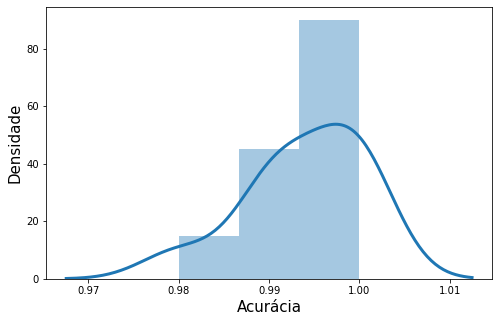

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

data = datasets.make_moons(n_samples = 1000, noise = .05)


y = data[1]
X = data[0]

Ns = 10 #number of executions
vacc = []
for n in range(0,Ns):
    p = 0.8 # fracao de elementos no conjunto de treinamento
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p)
    param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
    }
    model = RandomForestClassifier()
    best_model = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
  
    best_model.fit(X_train,y_train)
    y_pred = best_model.predict(X_test) 
    #print('Best parameters:', grid.best_params_)
    #print('Accuracy:', accuracy_score(y_pred, y_test))
    vacc.append(accuracy_score(y_pred, y_test))

print('Melhores parâmetros:', best_model.best_params_)
print('Acurácia média:', np.mean(vacc))
plt.figure(figsize=(8,5))
sns.distplot(vacc, hist = True, kde = True,kde_kws = {'linewidth': 3})
plt.xticks(color='k', size=10)
plt.yticks(color='k', size=10)
plt.xlabel('Acurácia', fontsize = 15)
plt.ylabel('Densidade', fontsize = 15)
plt.show(True)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.1s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.1s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.1s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.1s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.1s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    0.8s finished


Melhores parâmetros: {'max_leaf_nodes': 10, 'min_samples_split': 2}
Acurácia média: 0.994


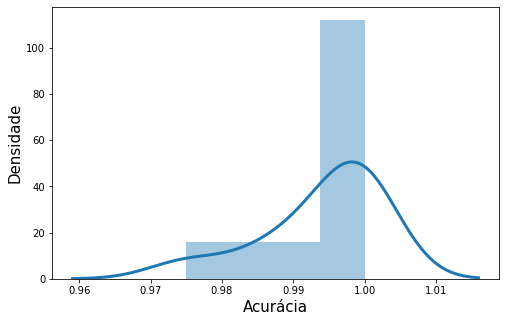

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

data = datasets.make_moons(n_samples = 1000, noise = .05)



y = data[1]
X = data[0]

Ns = 10 #number of executions
vacc = []
for n in range(0,Ns):
    p = 0.8 # fracao de elementos no conjunto de treinamento
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p)
    params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
    model = tree.DecisionTreeClassifier(random_state = 42)
    best_model = GridSearchCV(estimator = model, param_grid = params, 
                          cv = 3, n_jobs = -1, verbose = 2)
  
    best_model.fit(X_train,y_train)
    y_pred = best_model.predict(X_test) 
    #print('Best parameters:', grid.best_params_)
    #print('Accuracy:', accuracy_score(y_pred, y_test))
    vacc.append(accuracy_score(y_pred, y_test))

print('Melhores parâmetros:', best_model.best_params_)
print('Acurácia média:', np.mean(vacc))
plt.figure(figsize=(8,5))
sns.distplot(vacc, hist = True, kde = True,kde_kws = {'linewidth': 3})
plt.xticks(color='k', size=10)
plt.yticks(color='k', size=10)
plt.xlabel('Acurácia', fontsize = 15)
plt.ylabel('Densidade', fontsize = 15)
plt.show(True)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Melhores parâmetros: {'base_estimator__max_depth': 5, 'max_samples': 0.5}
Acurácia média: 0.9954999999999998


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished


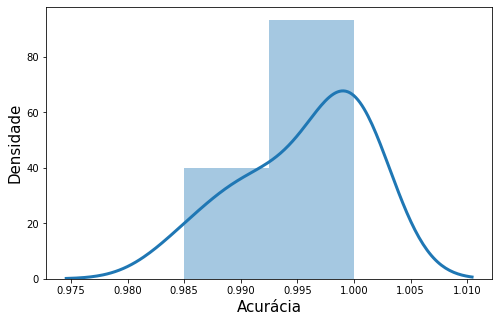

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
data = datasets.make_moons(n_samples = 1000, noise = .05)



y = data[1]
X = data[0]

Ns = 10 #number of executions
vacc = []
for n in range(0,Ns):
    p = 0.8 # fracao de elementos no conjunto de treinamento
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p)
    param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}
  

 #chama o classificador
    model = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 101),
                          n_estimators=10)
    
    best_model = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
  
    best_model.fit(X_train,y_train)
    y_pred = best_model.predict(X_test) 
    #print('Best parameters:', grid.best_params_)
    #print('Accuracy:', accuracy_score(y_pred, y_test))
    vacc.append(accuracy_score(y_pred, y_test))

print('Melhores parâmetros:', best_model.best_params_)
print('Acurácia média:', np.mean(vacc))

plt.figure(figsize=(8,5))
sns.distplot(vacc, hist = True, kde = True,kde_kws = {'linewidth': 3})
plt.xticks(color='k', size=10)
plt.yticks(color='k', size=10)
plt.xlabel('Acurácia', fontsize = 15)
plt.ylabel('Densidade', fontsize = 15)
plt.show(True)

## Exercício 8
Considere as bases: _Vehicle_, _winequality-red_ e _vertebralcolumn-3C_. Compare os classificadores:
**a)** Naive Bayes, **b)** Florestas aleatórias, **c)** k-vizinhos e **d)** Regressão logística.
Considere as medidas:
**i)** AUC (área sob a curva ROC), **ii)** Precisão, **iii)** Medida F1 e **iv)** Acurácia.
Ou seja, faça uma tabela para cada base, onde as linhas representam os classificadores e as colunas as medidas de avaliação.

In [60]:
# Leitura do arquivo do conjunto de dados 
vehicle = pd.read_csv('Vehicle.csv', header = (0))
print('Este conjunto de dados possui {} linhas e {} colunas.'.format(vehicle.shape[0], vehicle.shape[1]))

Este conjunto de dados possui 846 linhas e 19 colunas.


In [61]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

data = vehicle.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]
 

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)
acuracia_k_vizinhos = classificador_k_vizinhos(x_train, x_test, y_train, y_test)
precisao_k_vizinhos = precision_score(y_test, acuracia_k_vizinhos[2],average='weighted')
f1_k_vizinhos = f1_score(y_test,acuracia_k_vizinhos[2],
                            average='weighted')
##################################################################################################
##################################################################################################
##################################################################################################
acuracia_floresta = classificador_floresta_aleatoria(x_train, x_test, y_train, y_test)
precisao_floresta = precision_score(y_test, acuracia_floresta[2],average='weighted')
f1_floresta = f1_score(y_test,acuracia_floresta[2],
                            average='weighted')
##################################################################################################
##################################################################################################
##################################################################################################
acuracia_naive_bayes =classificador_naive_bayes(x_train, x_test, y_train, y_test)
precisao_naive_bayes = precision_score(y_test, acuracia_naive_bayes[2],average='weighted')
f1_naive_bayes = f1_score(y_test,acuracia_naive_bayes[2],
                            average='weighted')
#auc = roc_auc_score(y_test, acuracia_k_vizinhos[2])
#acuracia_regressao_logistica = classificador_regressao_logistica(x_train, x_test, y_train, y_test)
#acuracia_naive_bayes = classificador_naive_bayes(x_train, x_test, y_train, y_test)


In [62]:
from prettytable import PrettyTable
from prettytable import from_csv
from prettytable import from_html

In [63]:
# Cria a tabela
x = PrettyTable(["Classificadores", "Acurácia", "Precisão", "F1", "AUC"])

# Alinha as colunas
x.align["Classificadores"] = "l"
x.align["Acurácia"] = "l"
x.align["Precisão"] = "l"
x.align["F1"] = "l"
x.align["AUC"] = "r"

# Deixa um espaço entre a borda das colunas e o conteúdo (default)
x.padding_width = 1

In [64]:
x.add_row(["K-vizinhos",acuracia_k_vizinhos[0], precisao_k_vizinhos, f1_k_vizinhos, 0])
x.add_row(["Floresta-aleatória",acuracia_floresta[0], precisao_floresta, f1_floresta, 0])
x.add_row(["Naive Bayes",acuracia_naive_bayes[0], precisao_naive_bayes, f1_naive_bayes, 0])

In [65]:
print(x)

+--------------------+--------------------+--------------------+--------------------+-----+
| Classificadores    | Acurácia           | Precisão           | F1                 | AUC |
+--------------------+--------------------+--------------------+--------------------+-----+
| K-vizinhos         | 0.6338582677165354 | 0.6452486785464231 | 0.6380526991515381 |   0 |
| Floresta-aleatória | 0.7755905511811023 | 0.7752372249844955 | 0.7726036959753462 |   0 |
| Naive Bayes        | 0.4566929133858268 | 0.5671995855002858 | 0.4096569925194289 |   0 |
+--------------------+--------------------+--------------------+--------------------+-----+


In [66]:
# Leitura do arquivo do conjunto de dados 
vertebralcolumn = pd.read_csv('vertebralcolumn-2C.csv', header = (0))
print('Este conjunto de dados possui {} linhas e {} colunas.'.format(vertebralcolumn.shape[0], vertebralcolumn.shape[1]))

Este conjunto de dados possui 310 linhas e 7 colunas.


In [67]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

data = vertebralcolumn.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]
 

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)
acuracia_k_vizinhos = classificador_k_vizinhos(x_train, x_test, y_train, y_test)
precisao_k_vizinhos = precision_score(y_test, acuracia_k_vizinhos[2],average='weighted')
f1_k_vizinhos = f1_score(y_test,acuracia_k_vizinhos[2],
                            average='weighted')
##################################################################################################
##################################################################################################
##################################################################################################
acuracia_floresta = classificador_floresta_aleatoria(x_train, x_test, y_train, y_test)
precisao_floresta = precision_score(y_test, acuracia_floresta[2],average='weighted')
f1_floresta = f1_score(y_test,acuracia_floresta[2],
                            average='weighted')
##################################################################################################
##################################################################################################
##################################################################################################
acuracia_naive_bayes =classificador_naive_bayes(x_train, x_test, y_train, y_test)
precisao_naive_bayes = precision_score(y_test, acuracia_naive_bayes[2],average='weighted')
f1_naive_bayes = f1_score(y_test,acuracia_naive_bayes[2],
                            average='weighted')
#auc = roc_auc_score(y_test, acuracia_k_vizinhos[2])
#acuracia_regressao_logistica = classificador_regressao_logistica(x_train, x_test, y_train, y_test)
#acuracia_naive_bayes = classificador_naive_bayes(x_train, x_test, y_train, y_test)

In [68]:
# Cria a tabela
x = PrettyTable(["Classificadores", "Acurácia", "Precisão", "F1", "AUC"])

# Alinha as colunas
x.align["Classificadores"] = "l"
x.align["Acurácia"] = "l"
x.align["Precisão"] = "l"
x.align["F1"] = "l"
x.align["AUC"] = "r"

# Deixa um espaço entre a borda das colunas e o conteúdo (default)
x.padding_width = 1

In [69]:
x.add_row(["K-vizinhos",acuracia_k_vizinhos[0], precisao_k_vizinhos, f1_k_vizinhos, 0])
x.add_row(["Floresta-aleatória",acuracia_floresta[0], precisao_floresta, f1_floresta, 0])
x.add_row(["Naive Bayes",acuracia_naive_bayes[0], precisao_naive_bayes, f1_naive_bayes, 0])

In [70]:
print(x)

+--------------------+--------------------+--------------------+--------------------+-----+
| Classificadores    | Acurácia           | Precisão           | F1                 | AUC |
+--------------------+--------------------+--------------------+--------------------+-----+
| K-vizinhos         | 0.7956989247311828 | 0.8049310307374823 | 0.7994377679387168 |   0 |
| Floresta-aleatória | 0.8494623655913979 | 0.8440123729562528 | 0.8447399942175045 |   0 |
| Naive Bayes        | 0.7956989247311828 | 0.8486579897870221 | 0.8068450555261766 |   0 |
+--------------------+--------------------+--------------------+--------------------+-----+


In [71]:
# Leitura do arquivo do conjunto de dados 
winequality = pd.read_csv('winequality-red.csv', header = (0))
print('Este conjunto de dados possui {} linhas e {} colunas.'.format(winequality.shape[0], winequality.shape[1]))

Este conjunto de dados possui 1599 linhas e 12 colunas.


In [72]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

data = winequality.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]
 

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)
acuracia_k_vizinhos = classificador_k_vizinhos(x_train, x_test, y_train, y_test)
precisao_k_vizinhos = precision_score(y_test, acuracia_k_vizinhos[2],average='weighted')
#auc_k_vizinhos = roc_auc_score(y_test, acuracia_k_vizinhos[2])
f1_k_vizinhos = f1_score(y_test,acuracia_k_vizinhos[2],
                            average='weighted')
##################################################################################################
##################################################################################################
##################################################################################################
acuracia_floresta = classificador_floresta_aleatoria(x_train, x_test, y_train, y_test)
precisao_floresta = precision_score(y_test, acuracia_floresta[2],average='weighted')
#auc_floresta = roc_auc_score(y_test, acuracia_k_vizinhos[2])
f1_floresta = f1_score(y_test,acuracia_floresta[2],
                            average='weighted')
##################################################################################################
##################################################################################################
##################################################################################################
acuracia_naive_bayes =classificador_naive_bayes(x_train, x_test, y_train, y_test)
precisao_naive_bayes = precision_score(y_test, acuracia_naive_bayes[2],average='weighted')
#auc_k_naive_bayes = roc_auc_score(y_test, acuracia_k_vizinhos[2])
f1_naive_bayes = f1_score(y_test,acuracia_naive_bayes[2],
                            average='weighted')
#auc = roc_auc_score(y_test, acuracia_k_vizinhos[2])
#acuracia_regressao_logistica = classificador_regressao_logistica(x_train, x_test, y_train, y_test)
#acuracia_naive_bayes = classificador_naive_bayes(x_train, x_test, y_train, y_test)

In [73]:
# Cria a tabela
x = PrettyTable(["Classificadores", "Acurácia", "Precisão", "F1", "AUC"])

# Alinha as colunas
x.align["Classificadores"] = "l"
x.align["Acurácia"] = "l"
x.align["Precisão"] = "l"
x.align["F1"] = "l"
x.align["AUC"] = "r"

# Deixa um espaço entre a borda das colunas e o conteúdo (default)
x.padding_width = 1

In [74]:
x.add_row(["K-vizinhos",acuracia_k_vizinhos[0], precisao_k_vizinhos, f1_k_vizinhos, 0])
x.add_row(["Floresta-aleatória",acuracia_floresta[0], precisao_floresta, f1_floresta, 0])
x.add_row(["Naive Bayes",acuracia_naive_bayes[0], precisao_naive_bayes, f1_naive_bayes, 0])

In [75]:
print(x)

+--------------------+---------------------+---------------------+--------------------+-----+
| Classificadores    | Acurácia            | Precisão            | F1                 | AUC |
+--------------------+---------------------+---------------------+--------------------+-----+
| K-vizinhos         | 0.48541666666666666 | 0.45867404375927107 | 0.4620547689077472 |   0 |
| Floresta-aleatória | 0.66875             | 0.6410076664017069  | 0.6526745248538011 |   0 |
| Naive Bayes        | 0.5416666666666666  | 0.5470955965844574  | 0.5432650992495763 |   0 |
+--------------------+---------------------+---------------------+--------------------+-----+


## Exercício 9
Considere o código abaixa.
Avalie como o desbalanceamento influencia nos resultados usando as medidas: **i)** AUC (área sob a curva ROC), **ii)** Precisão, **iii)** Medida F1 e **iv)** Acurácia. Elabore um estudo e proceda com o desenvolvimento dos códigos. Dica: use o método de validação cruzada estratificado na classificação e discuta a comparação com o caso sem o uso de estratificação.

Counter({0: 9900, 1: 100})


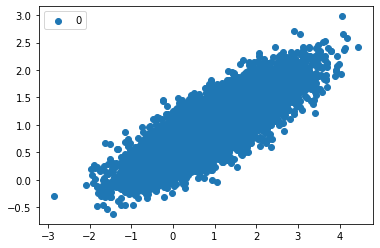

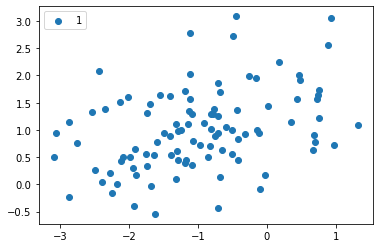

In [76]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
 pyplot.legend()
 pyplot.show()


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Melhor k: 1  AUC: 0.7635858585858586


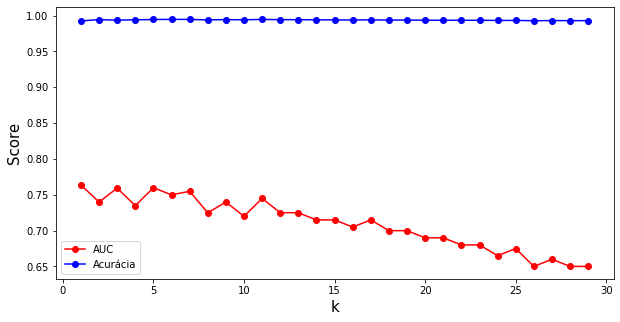

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vk = []
for k in range(1, 30):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vk.append(k)
    #print('k:', k)
    #print('Average accuracy:', np.mean(vacc))
    #print('Average AUC:', np.mean(vauc))
best_k = np.argmax(mauc)+1
print('Melhor k:', best_k, ' AUC:',mauc[best_k-1])
plt.figure(figsize=(10,5))
plt.plot(vk, mauc, '-ro', label= 'AUC')
plt.plot(vk, macc, '-bo', label = 'Acurácia')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [79]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 
score = accuracy_score(y_pred, y_test)

print('Acurácia:', accuracy_score(y_test, y_pred))
print('Medida F1:', f1_score(y_test, y_pred, average="macro"))
print('Precisão:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Acurácia: 0.992
Medida F1: 0.664654594232059
Precisão: 0.9959919839679359
Recall: 0.6


Melhor c: 3  AUC: 0.7497979797979799


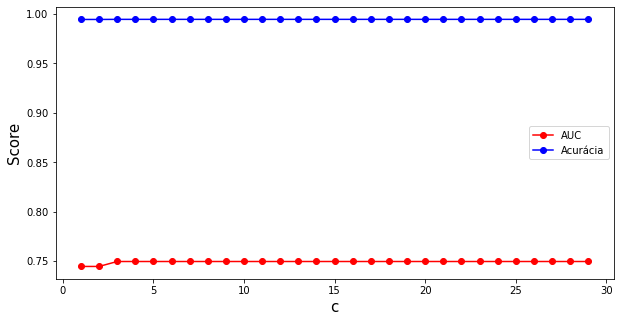

In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vc = []
for c in range(1, 30):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = SVC(C = c, gamma = 'auto')
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vc.append(c)
    #print('k:', k)
    #print('Average accuracy:', np.mean(vacc))
    #print('Average AUC:', np.mean(vauc))
best_c = np.argmax(mauc)+1
print('Melhor c:', best_c, ' AUC:',mauc[best_c-1])
plt.figure(figsize=(10,5))
plt.plot(vc, mauc, '-ro', label= 'AUC')
plt.plot(vc, macc, '-bo', label = 'Acurácia')
plt.xlabel('c', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [81]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

model = SVC(C = c, gamma = 'auto')
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 
score = accuracy_score(y_pred, y_test)

print('Acurácia:', accuracy_score(y_test, y_pred))
print('Medida F1:', f1_score(y_test, y_pred, average="macro"))
print('Precisão:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Acurácia: 0.994
Medida F1: 0.7842037116961589
Precisão: 0.9969879518072289
Recall: 0.7


Melhor n: 5  AUC: 0.7843434343434343


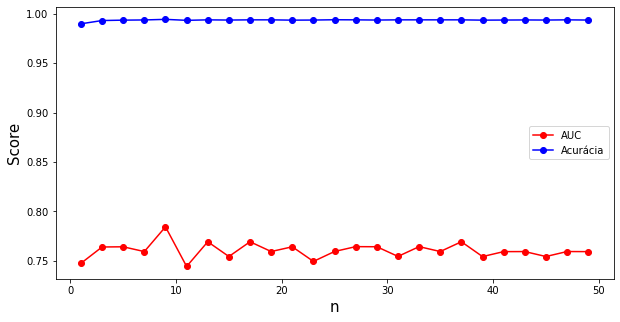

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vn = []
for n in range(1, 50,2):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+1
print('Melhor n:', best_n, ' AUC:',mauc[best_n-1])
plt.figure(figsize=(10,5))
plt.plot(vn, mauc, '-ro', label= 'AUC')
plt.plot(vn, macc, '-bo', label = 'Acurácia')
plt.xlabel('n', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

model = RandomForestClassifier(n_estimators=n)
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 
score = accuracy_score(y_pred, y_test)

print('Acurácia:', accuracy_score(y_test, y_pred))
print('Medida F1:', f1_score(y_test, y_pred, average="macro"))
print('Precisão:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Acurácia: 0.995
Medida F1: 0.8320738874895046
Precisão: 0.9974874371859297
Recall: 0.75


## Exercício 10
Realize a classificação da base Titanic. Use os métodos de seleção de modelos e determine o melhor modelo e seus hiperparâmetros.

In [84]:
# Leitura do arquivo do conjunto de dados
train = pd.read_csv('train.csv', header = (0))
print('Este conjunto de treino possui {} linhas e {} colunas.'.format(
    train.shape[0], train.shape[1]))

test = pd.read_csv('test.csv', header = (0))
print('Este conjunto de teste possui {} linhas e {} colunas.'.format(
    test.shape[0], test.shape[1]))

Este conjunto de treino possui 891 linhas e 12 colunas.
Este conjunto de teste possui 418 linhas e 11 colunas.


In [85]:
# Identificando as colunas de treino
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [86]:
# Identificando as colunas de teste
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Abaixo é feito a descrição das varíaveis destes conjuntos de dados para melhor compreendermos e interpretarmos os resultados.

 - **PassengerId:** número de identificação do passageiro;
 - **Survived:** informação se o passageiro sobreviveu ao acidente (1 = sim, 0 = não);
 - **Pclass:** classe da passagem (1 = 1ª classe, 2 = 2ª classe e 3 = 3ª classe);
 - **Name:** nome do passageiro;
 - **Sexo:** sexo do passageiro;
 - **Age:** idade do passageiro;
 - **SibSp:** quantidade de cônjuges e irmãos a bordo; 
 - **Parch:** quantidade de pais e filhos a bordo;
 - **Ticket:** número da passagem;
 - **Cabin:** número da cabine do passageiro;
 - **Embarked:** porto onde o passageiro embarcou (C = Cherbourg, Q = Queenstown, S = Southampton).

In [87]:
# Mostra as primeiras cinco linhas do conjunto de treino
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
# Identifica o tipo de dado em cada coluna
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [89]:
# Mostra as primeiras cinco linhas do conjunto de teste
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [90]:
# Identifica o tipo de dado em cada coluna
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [91]:
# Investigando possíveis linhas duplicadas
train.duplicated().sum()

0

In [92]:
# Investigando possíveis linhas duplicadas
test.duplicated().sum()

0

In [93]:
# Verificando a existência de dados faltantes
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
# Verificando a existência de dados faltantes
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

É possível observar que nas variáveis **Age** e **Cabin** há uma quantidade significativa de dados faltantes.

In [95]:
# Estatísticas descritivas das variáveis do conjunto de treino
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
# Estatísticas descritivas das variáveis não numéricas
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Niskanen, Mr. Juha",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [97]:
# Estatísticas descritivas das variáveis do conjunto de teste
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [98]:
# Estatísticas descritivas das variáveis não numéricas
test.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Christy, Mrs. (Alice Frances)",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


Observa-se que os valores da váriável **Name** são únicos e que não há dados faltantes para **Name** e **Sex**.
Nota-se também que há mais passageiros do sexo masculino  e o porto pelo qual mais passageiros embarcaram foi o de Southampton. 

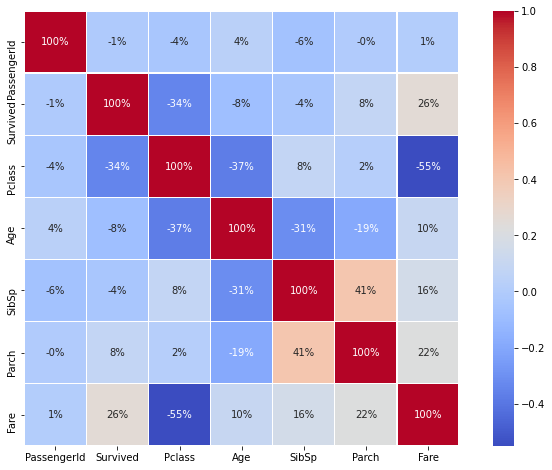

In [99]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr().round(2), annot=True, fmt='.0%', cmap='coolwarm', linewidths=0.2, square=True)
plt.show(True)

In [100]:
# Salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# Extrair coluna Survived e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis = 1, inplace = True)

# Concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs = [train, test], axis = 0).reset_index(drop = True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


Nesta etapa desconsiderou asa variáveis **PassengerId**, **Name**, **Ticket** e **Cabin**, pois não são relevantes para o modelo.

In [101]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [102]:
# Identificando as colunas do conjunto de dados agrupado
df_merged.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [103]:
# Verificando a existência de dados faltantes
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Na saída acima é possível conferir a quantidade de dados faltantes em cada uma das variáveis.
Para contornar este problema, nas variáveis **Age** e **Fare** será incluída o valor da mediana, e para a variável **Embarked** será incluído o valor com maior frequência.

In [104]:
# Inclusão de valores nos dados faltantes
# Age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace = True)

# Fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace = True)

# Embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace = True)

In [105]:
# Conversão da variável Sex em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# Variável dummie para Embaked
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix = 'Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis = 1)
df_merged.drop('Embarked', axis = 1, inplace = True)

In [106]:
# Recuperando o conjunto de dados de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

In [107]:
# Convertendo os dados para o formato numpy
# Treino
data_train = train.to_numpy()
nrow, ncol = data_train.shape
y = data_train[:,0]
X = data_train[:,1:ncol]
# Teste
data_test = test.to_numpy()
X_test = data_test

In [108]:
# Normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 3.99e-17  2.27e-16  4.39e-17  5.38e-17  3.99e-18  3.19e-17 -1.99e-17
  0.00e+00 -4.98e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [109]:
# K-vizinhos
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

k = 16
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 
score = accuracy_score(y_pred, y_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.992
F1 score: 0.664654594232059
Precision: 0.9959919839679359
Recall: 0.6


In [110]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vc = []
for c in range(1, 30):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = SVC(C = c, gamma = 'auto')
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)
        
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))        

Accuracy: 0.7865168539325843
F1 score: 0.7009882018012098
Precision: 0.7651639344262294
Recall: 0.6931614751163623


In [111]:
# Floresta aleatória
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vn = []
for n in range(1, 50,2):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)
        
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))       

Accuracy: 0.8876404494382022
F1 score: 0.8582685124148538
Precision: 0.8664488017429194
Recall: 0.8510562119584675


Portanto, de acordo com as medidas de avaliação de desempenho das classificações, o classificador que obteve melhores índices foi o florestas aleatórias.